## Final Project Submission

Please fill out:
* Student name: Thomas Brown
* Student pace: Full Time
* Scheduled project review date/time: TBD
* Instructor name: Abhineet Kulkarni
* Blog post URL:TBD


## Description and Use-Case:

Data Source: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes?select=aac_intakes_outcomes.csv

The purpose of this project is to examine data from one of Austin's largest animal shelters and build a machine learning model to predict outcomes of animals as they come in and are processed in the system.  An efficient and intelligent model can help "manage the inventory" of the shelter and get animals adopted more quickly or returned to their owners more quickly when applicable.  <br><br>
The outcomes are listed below:
- Transfer           
- Adoption           
- Euthanasia        
- Return to Owner     
- Died                 
- Rto-Adopt
- Missing
- Disposal  <br>

We'll explore these outcomes (as well as the sub categories) in the EDA phase, but with an effective model, we can run the shelter more efficiently leading to happier animals and shelter employees!

# Importing Libraries:

In [1]:
# Standard Data-sci packages:
import pandas as pd
import numpy as np

# Scikit-Learn:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


# Plots and Graphs:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Other:
import warnings
warnings.filterwarnings('ignore')

# Importing Data:

## Main DF:

In [2]:
# Main Dataframe
dfi = pd.read_csv('aac_intakes_outcomes.csv.zip')
display(dfi.head())
dfi.info()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
age_upon_outcome              79672 non-null object
animal_id_outcome             79672 non-null object
date_of_birth                 79672 non-null object
outcome_subtype               36348 non-null object
outcome_type                  79662 non-null object
sex_upon_outcome              79671 non-null object
age_upon_outcome_(days)       79672 non-null int64
age_upon_outcome_(years)      79672 non-null float64
age_upon_outcome_age_group    79672 non-null object
outcome_datetime              79672 non-null object
outcome_month                 79672 non-null int64
outcome_year                  79672 non-null int64
outcome_monthyear             79672 non-null object
outcome_weekday               79672 non-null object
outcome_hour                  79672 non-null int64
outcome_number                79672 non-null float64
dob_year                      79672 non-null int64
dob_month 

## Intake Data:

In [3]:
dfii = pd.read_csv('aac_intakes.csv.zip')
dfii.head()

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
0,8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female
1,11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,Runster,Intact Male
2,4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,NaN,Intact Female
3,4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,Neutered Male
4,2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Odin,Neutered Male


We will need to add name to the main DF.

## Combining the DFs:

In [4]:
dfx = dfii[['animal_id', 'name', 'breed']]
df = dfi.set_index('animal_id_intake').join(dfx.set_index('animal_id'), 
                                            rsuffix = '_in', how = 'left')
df['unique_id'] = df['animal_id_outcome'] + df['intake_number'].astype('str')

In [5]:
df = df.drop_duplicates(subset = ['unique_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79636 entries, A006100 to A769067
Data columns (total 43 columns):
age_upon_outcome              79636 non-null object
animal_id_outcome             79636 non-null object
date_of_birth                 79636 non-null object
outcome_subtype               36332 non-null object
outcome_type                  79626 non-null object
sex_upon_outcome              79635 non-null object
age_upon_outcome_(days)       79636 non-null int64
age_upon_outcome_(years)      79636 non-null float64
age_upon_outcome_age_group    79636 non-null object
outcome_datetime              79636 non-null object
outcome_month                 79636 non-null int64
outcome_year                  79636 non-null int64
outcome_monthyear             79636 non-null object
outcome_weekday               79636 non-null object
outcome_hour                  79636 non-null int64
outcome_number                79636 non-null float64
dob_year                      79636 non-null int64
dob_mon

# Cleaning Data:

In [6]:
df.isna().sum()

age_upon_outcome                  0
animal_id_outcome                 0
date_of_birth                     0
outcome_subtype               43304
outcome_type                     10
sex_upon_outcome                  1
age_upon_outcome_(days)           0
age_upon_outcome_(years)          0
age_upon_outcome_age_group        0
outcome_datetime                  0
outcome_month                     0
outcome_year                      0
outcome_monthyear                 0
outcome_weekday                   0
outcome_hour                      0
outcome_number                    0
dob_year                          0
dob_month                         0
dob_monthyear                     0
age_upon_intake                   0
animal_type                       0
breed                             0
color                             0
found_location                    0
intake_condition                  0
intake_type                       0
sex_upon_intake                   1
count                       

## Removing Certain Outcomes:

In [7]:
df.outcome_type.value_counts()

Adoption           33583
Transfer           23791
Return to Owner    14784
Euthanasia          6237
Died                 690
Disposal             301
Rto-Adopt            179
Missing               46
Relocate              15
Name: outcome_type, dtype: int64

As we can see above, there are a number of outcomes, but my main focus will be on the top three:
- Adoption
- Transfer
- Return to Owner
While there were a number of animals that were euthanized or died, I will not include these rows in the model (either in training or testing).

This is a no-kill shelter, and euthanasia is a last resort.  I will not build a model that will recommend it as an outcome in any case based on innocuous features such as breed or age.  If it is necessary to euthanize an animal for health reasons, this will be obvious upon intake (massive injury or illness).  We do not need a more general machine learning model for this. 

In [8]:
df = df[df['outcome_type'].isin(['Adoption', 'Transfer', 'Return to Owner'])]
df['outcome_type'].value_counts()

Adoption           33583
Transfer           23791
Return to Owner    14784
Name: outcome_type, dtype: int64

## Animal Type:

There are too few birds or other animals to accurately model, so I'm going to focus my efforts on dogs and cats!

In [9]:
df = df[df.animal_type != 'Bird']
df = df[df.animal_type != 'Other']
df.animal_type.value_counts()

Dog    43538
Cat    27568
Name: animal_type, dtype: int64

## Color:

3.5 thousand missing values.  For this one, I'll likely map onto probabilities.  Maybe at some point I'll drop the nulls and see if I get better results with the ML model.

In [10]:
df.color.nunique()

486

We'll need to do some grouping as well. . . Probably in a separate excel sheet, and then match the values after.  154 values are too many. . . 

## Name: (DONE)

In [11]:
df.name.isna().sum()

18264

In [12]:
df.name.fillna(0, inplace = True)
df['has_name'] = df['name'].map(lambda x: 1 if not x == 0 else 0)

I think the simplest option here is has name or does not have name.  I would also be interested about less common or longer names.  Perhaps that indicates more involved owners.  Who knows!

In [13]:
# Seems to be working!
df['has_name'].value_counts()

1    52842
0    18264
Name: has_name, dtype: int64

Idea: Has common name as a column. . . 

## Outcome Subtype:

10 thousand missing values here.  This is an additional classification problem after the first.  We can worry about this later.

## Outcome Type: (DONE)

We're ok here.

In [14]:
df['outcome_type'].isna().sum()

0

## Sex Upon Outcome (DONE)

In [15]:
df.sex_upon_outcome.dropna(inplace = True)

In [16]:
df.sex_upon_outcome.value_counts()

Neutered Male    27366
Spayed Female    24900
Intact Male       8227
Intact Female     8135
Unknown           2477
Name: sex_upon_outcome, dtype: int64

## Sex Upon Intake (DONE)

In [17]:
df['sex_upon_intake'].fillna('Unknown', inplace = True)

In [18]:
df.sex_upon_intake.value_counts()

Intact Male      23618
Intact Female    22387
Neutered Male    11975
Spayed Female    10648
Unknown           2478
Name: sex_upon_intake, dtype: int64

## Choosing Columns for Main DF:

In [19]:
col_to_keep = ['sex_upon_intake', 'age_upon_intake_(years)', 
               'time_in_shelter_days','animal_type', 'breed',
               'color', 'found_location', 'intake_condition', 
               'intake_type', 'intake_number', 'has_name',
               'outcome_datetime', 'outcome_type']
df_eda = df[col_to_keep]
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71106 entries, A006100 to A769066
Data columns (total 13 columns):
sex_upon_intake            71106 non-null object
age_upon_intake_(years)    71106 non-null float64
time_in_shelter_days       71106 non-null float64
animal_type                71106 non-null object
breed                      71106 non-null object
color                      71106 non-null object
found_location             71106 non-null object
intake_condition           71106 non-null object
intake_type                71106 non-null object
intake_number              71106 non-null float64
has_name                   71106 non-null int64
outcome_datetime           71106 non-null object
outcome_type               71106 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 7.6+ MB


# EDA:

## Different Outcome Types:

## Variables Compared Against Outcomes:

## Other:

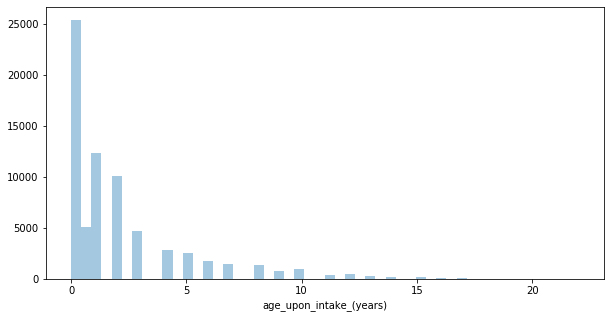

In [20]:
f, ax = plt.subplots(figsize=(10, 5))
sns.set_color_codes("pastel")
sns.distplot(df_eda['age_upon_intake_(years)'], kde = False)

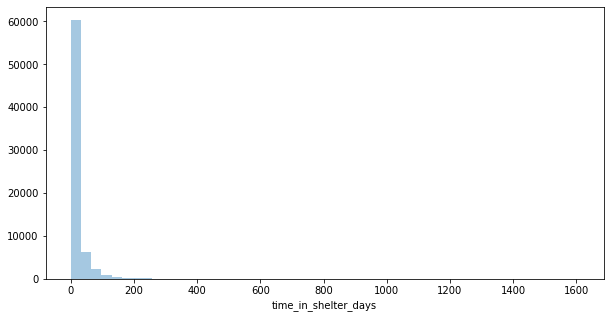

In [21]:
# Should take outliers out. . . 
f, ax = plt.subplots(figsize=(10, 5))
sns.set_color_codes("pastel")
sns.distplot(df_eda['time_in_shelter_days'], kde = False)

In [22]:
# Let's get a tree map going with different outcomes and sub types
# fig = px.treemap(df_eda, path=['outcome_type', 'outcome_subtype'], values='count')
# fig.show()
# Not working for some reason. . . 

# Feature Engineering:

In [23]:
dfi = df_eda
dfi.head()

,sex_upon_intake,age_upon_intake_(years),time_in_shelter_days,animal_type,breed,color,found_location,intake_condition,intake_type,intake_number,has_name,outcome_datetime,outcome_type
A006100,Neutered Male,10.0,0.588194,Dog,Spinone Italiano Mix,Yellow/White,Colony Creek And Hunters Trace in Austin (TX),Normal,Stray,1.0,1,2017-12-07 14:07:00,Return to Owner
A006100,Neutered Male,7.0,1.259722,Dog,Spinone Italiano Mix,Yellow/White,8700 Research Blvd in Austin (TX),Normal,Public Assist,2.0,1,2014-12-20 16:35:00,Return to Owner
A006100,Neutered Male,6.0,1.113889,Dog,Spinone Italiano Mix,Yellow/White,8700 Research in Austin (TX),Normal,Public Assist,3.0,1,2014-03-08 17:10:00,Return to Owner
A047759,Neutered Male,10.0,4.970139,Dog,Dachshund,Tricolor,Austin (TX),Normal,Owner Surrender,1.0,1,2014-04-07 15:12:00,Transfer
A134067,Neutered Male,16.0,0.119444,Dog,Shetland Sheepdog,Brown/White,12034 Research Blvd in Austin (TX),Injured,Public Assist,1.0,1,2013-11-16 11:54:00,Return to Owner


In [24]:
# sex_upon_intake
# Dummy variable, no change
dfi['sex'] = np.where(dfi['sex_upon_intake'].str.contains('Male'), 1, 0)
dfi['intact'] = np.where(dfi['sex_upon_intake'].str.contains('Intact'), 1, 0)
dfi['unk_sex'] = np.where(dfi['sex_upon_intake'].str.contains('Unknown'), 1, 0)
#dfi.drop(columns = 'sex_upon_intake', axis = 1, inplace = True)

In [25]:
# age_upon_intake_(years)
# Scale


In [26]:
# time_in_shelter_days 
# Scale

In [27]:
# animal_type 
# Dummy for dog or cat
dfi['dog'] = dfi['animal_type'].map(lambda x: 1 if x == 'Dog' else 0)
dfi['cat'] = dfi['animal_type'].map(lambda x: 1 if x == 'Cat' else 0)

In [28]:
# breed
# Dummy for top 20
def dum_sign(dummy_col, threshold=0.1):
    # removes the bind
    dummy_col = dummy_col.copy()
    # Ratio of dummy to rest of column
    count = pd.value_counts(dummy_col) / len(dummy_col)
    # Condition
    mask = dummy_col.isin(count[count > threshold].index)
    # Replaces 
    dummy_col[~mask] = "others"

    return pd.get_dummies(dummy_col, prefix=dummy_col.name)

df_breed = dum_sign(dfi['breed'], threshold = .01)
dfi = pd.concat([dfi, df_breed], axis = 1)

In [29]:
# color
# Dummy for top 10-20
df_col = dum_sign(dfi['color'], threshold = .025)
dfi = pd.concat([dfi, df_col], axis = 1)

In [30]:
# found_location
## Austin (TX)                                   13108
## Outside Jurisdiction                            896
## Travis (TX)                                     841
## 7201 Levander Loop in Austin (TX)               477
## Del Valle (TX)                                  378
# Dummy for top ten, or possibly just Austin or outside Austin
df_loc = dum_sign(dfi['found_location'], threshold = .01)
dfi = pd.concat([dfi, df_loc], axis = 1)

In [31]:
# intake_condition
# Regular dummy variables
cond_dummy = pd.get_dummies(dfi['intake_condition'])
dfi = pd.concat([dfi, cond_dummy], axis = 1)

In [32]:
# intake_type         
# Regular dummy variables
int_type_dummy = pd.get_dummies(dfi['intake_type'])
dfi = pd.concat([dfi, int_type_dummy], axis = 1)

In [33]:
# intake_number
# Dummy for 1, 2, 3, and 4+
dfi['count_1'] = dfi['intake_number'].map(lambda x: 1 if x == 1 else 0)
dfi['count_2'] = dfi['intake_number'].map(lambda x: 1 if x == 2 else 0)
dfi['count_3'] = dfi['intake_number'].map(lambda x: 1 if x == 3 else 0)
dfi['count_4_plus'] = dfi['intake_number'].map(lambda x: 1 if x > 3 else 0)

In [34]:
# has_name               
# Good to go

In [35]:
# outcome_datetime      
# TBD

In [36]:
# outcome_type  
# Return to Owner = 1
# Transfer = 2
# Adoption = 3
dfi['outcome'] = dfi['outcome_type'].map(lambda x: 1 if x == 'Return to Owner' 
                                         else (2 if x == 'Transfer' 
                                               else 3))

In [37]:
# outcome_subtype   
# Leave for now. . . 

## Multicollinearity:

In [38]:
def multicol(x):
    sns.set_style('white')
    f, ax = plt.subplots(figsize=(9, 7))
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    sns.heatmap(x.corr(), vmin=0.3, mask = mask);

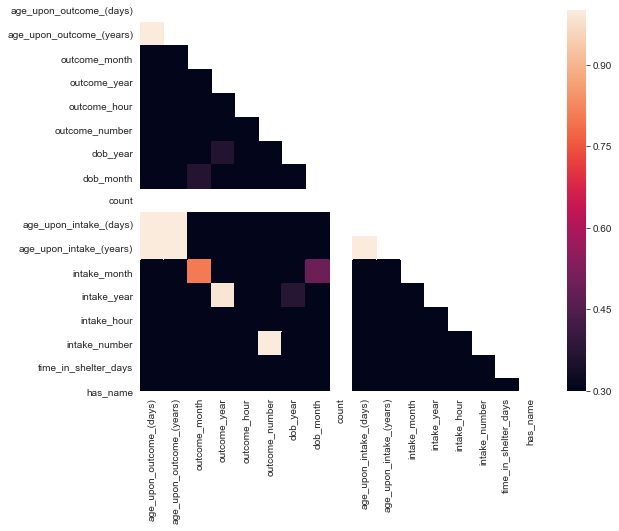

In [39]:
multicol(df)

## Scaling:

In [40]:
# Import StandardScaler
#from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
#scaler = StandardScaler()

# Transform the training and test sets
#scaled_data_train = scaler.fit_transform(X_train)
#scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
#scaled_df_train = pd.DataFrame(scaled_data_train, columns=one_hot_df.columns)
#scaled_df_train.head()

## Log Transformations:

# Predictor Variables:

There are quite a few variables to dig through in the main data frame, but here are the main predictor variables we'll be using for our model:
1. Sex (This one is interesting as it has neutered/spayed vs intact as well as biological sex)
2. Age on intake
3. Time in shelter
4. Animal type (Cats, dogs, birds, or other!)
5. Breed (Categorical variable hell)
6. Color(Categorical variable hell)
7. Found location (We'll need to split this up into a few main areas)
8. Intake condition (Sick, healthy, aged, feral, etc. . . )
9. Intake type (Public assist, Stray, owner abandonment, etc. . . )
10. Count (How many times has this animal been in the shelter)
11. Has name ( . . . upon intake)
12. Outcome day/time (maybe more adoptions happen on weekend. . .)

# Train Test Split:

In [41]:
# Putting the final DF back together:

# X vs y:
X = dfi.drop(['outcome', 'outcome_type', 'sex_upon_intake', 'age_upon_intake_(years)',
              'time_in_shelter_days', 'animal_type', 'breed', 
              'color', 'found_location', 'intake_condition', 'intake_type', 
              'intake_number', 'outcome_datetime'], axis = 1)
y = dfi['outcome']
# Splitting the data.  Test size 20%.  Random_state 123
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state = 123)
print(len(X_train), len(X_test), len(y_train), len(y_test))


56884 14222 56884 14222


# Baseline Model:

Probably use Log Classifier here

In [42]:
'''
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)
'''

'\ndef print_metrics(labels, preds):\n    print("Precision Score: {}".format(precision_score(labels, preds)))\n    print("Recall Score: {}".format(recall_score(labels, preds)))\n    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))\n    print("F1 Score: {}".format(f1_score(labels, preds)))\n    \nprint_metrics(y_test, test_preds)\n'

# Improved Models:

Make some pipelines

In [43]:
# Example code
'''
scaled_pipeline_1 = Pipeline([('ss', StandardScaler()), 
                              ('knn', KNeighborsClassifier())])

scaled_pipeline_1.fit(X_train, y_train)
scaled_pipeline_1.score(X_test, y_test)
'''

"\nscaled_pipeline_1 = Pipeline([('ss', StandardScaler()), \n                              ('knn', KNeighborsClassifier())])\n\nscaled_pipeline_1.fit(X_train, y_train)\nscaled_pipeline_1.score(X_test, y_test)\n"

## K-Nearest-Neighbors:

First, we'll start by building a pipeline for this model.

## Decision Tree:

In [44]:
# Print tree with max depth set to none for funsies

## Random Forest:

In [45]:
# Get feature importance bar chart
forest = RandomForestClassifier(n_estimators=150, max_depth= 20)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
display(forest.score(X_train, y_train))

0.695977779340412

In [47]:
display(forest.score(X_test, y_test))

0.6661510336099001

In [48]:
pred = forest.predict(X_test)
print(confusion_matrix(y_test, pred))

# Notes: getting most of the return to owner correct,
# Gets caught between actual transfers vs thinking they get adopted
# Gets most of the adopted with some spill over
# Maybe a balancing issue?
# 3 = adoption
# 2 = transfer
# 1 = return to owner

[[1820  108 1010]
 [ 306 2259 2043]
 [ 671  610 5395]]


## XG Boost:

## SVM:

# Final Model:

## Feature Importance:

# Model Comparisons:

In [49]:
'''
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))
'''

'\npred = tree_clf.predict(data_test)\n\n# Confusion matrix and classification report\nprint(confusion_matrix(target_test, pred))\nprint(classification_report(target_test, pred))\n'

## ROC Curves:

## Confusion Matrix:

## F1 vs Accuracy vs Recall etc. . . 

# Conclusion: